In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!pip install bnlp_toolkit

     |████████████████████████████████| 23.9 MB 1.9 MB/s 
     |████████████████████████████████| 1.2 MB 42.8 MB/s 
     |████████████████████████████████| 743 kB 56.0 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


Gussian Naive Bayes

In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from bnlp.corpus import stopwords, punctuations
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Vectorizing and applying TF-IDF
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
#pipe =Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),('model', GaussianNB())])
#pipe =  Pipeline([('vect', CountVectorizer()),('tfidfvec',TfidfVectorizer(max_df=0.95, min_df=2, max_features=n_features, stop_words='english')), ('model', LinearSVC())])

In [ ]:
import pandas as pd  
fake = pd.read_csv('/content/drive/MyDrive/Bangla dataset/Fake-1K.csv')  
#true = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BanglaDataset/LabeledAuthentic-7K.csv',index_col=0)
true = pd.read_csv('/content/drive/MyDrive/Bangla dataset/LabeledAuthentic-7K.csv',index_col=0)

*Then* we add a flag to track fake and real

In [ ]:
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
fake.head()

,articleID,domain,date,category,headline,content,label,target
0,1,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0,fake
1,2,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0,fake
2,3,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0,fake
3,4,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0,fake
4,5,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0,fake


In [ ]:
true.head()

,domain,date,category,source,relation,headline,content,label,target
articleID,,,,,,,,,
1,bd-pratidin.com,2018-09-20 08:16:43,Sports,আফগান ক্রিকেট বোর্ড (এসিবি) প্রধান,Related,হঠাৎ আফগান ক্রিকেট বোর্ড প্রধানের পদত্যাগ,ক্রিকেট বিশ্বের নতুন চমকের নাম আফগানিস্তান। কয়...,1.0,true
2,jugantor.com,2018-09-20 20:20:20,Sports,Reporter,Related,টস হেরে বোলিংয়ে বাংলাদেশ,এশিয়া কাপের ষষ্ঠ ম্যাচে বাংলাদেশ দলের বিপক্ষে ...,1.0,true
3,bd24live.com,2018-09-20 16:39:40,National,Reporter,Related,রাজধানীতে বিশেষ অভিযানে আটক ৪৩,রাজধানীতে মাদক বিরোধী বিশেষ অভিযান পরিচালনা কর...,1.0,true
4,bd24live.com,2018-09-19 18:27:56,National,জননিরাপত্তা বিভাগের সচিব,Related,উস্কানি রোধে নজরদারি থাকবে সামাজিক যোগাযোগ মাধ...,সনাতন ধর্মাবলম্বীদের সবচেয়ে বড় ধর্মীয় উৎসব দুর...,1.0,true
5,somoynews.tv,2018-09-20 10:15:28,Finance,পেট্রোল পাম্প মালিক সমিতি সভাপতি,Related,"'যেখানে তেল আসত ৭ দিনে, এখন তা আসবে অতি দ্রুত'",ভারত থেকে পাইপ লাইনের মাধ্যমে সরাসরি দেশে জ্বা...,1.0,true


Concatinate Dataset

In [ ]:
news = pd.concat([fake, true])



In [ ]:
news.head(20)

,articleID,domain,date,category,headline,content,label,target,source,relation
0,1.0,channeldhaka.news,2019-03-14T13:34:14+00:00,International,মুরগির হামলায় শেয়াল নিহত,"বাংলায় একটা প্রবাদ আছে, শেয়ালের কাছে মুরগী বর্...",0.0,fake,NaN,NaN
1,2.0,earki.com,"সেম্বর ১৭, ২০১৮",Miscellaneous,বিটিভিতে যেবার আমি ইন্টারভিউ দিতে গেলাম,"BTV থেকে লোকজন আসছে, ইন্টারভিউ নিবে।চারজনের টি...",0.0,fake,NaN,NaN
2,3.0,earki.com,"২০:৩৯, জানুয়ারি ১৪, ২০১৯",Miscellaneous,বিদেশ থেকে উন্নতমানের বিরোধীদল আমদানি করার পরা...,অদ্ভুত বিরোধীদলহীনতায় ভুগছে সরকার। এ এক অন্যরক...,0.0,fake,NaN,NaN
3,4.0,channeldhaka.news,2018-06-30T15:56:47+00:00,Sports,অবসর নেয়ার ঘোষণা দিলেন মেসি !,রাশিয়া বিশ্বকাপ নকআউট পর্বে ফ্রান্সের সাথে ৪-৩...,0.0,fake,NaN,NaN
4,5.0,motikontho.wordpress.com,2013-03-05T21:55:45+00:00,Miscellaneous,"মাদারফাকার নহে, ব্রাদারফাকার: সাকা | দৈনিক মতি...","নিজস্ব মতিবেদক‘মাদারফাকার নহে, আমি ব্রাদারফাকা...",0.0,fake,NaN,NaN
5,6.0,channeldhaka.news,2018-12-24T18:17:50+00:00,Miscellaneous,বিয়ের পিড়িতে বসছেন মিয়া খলিফা ! ছেলে কুমিল্লার,বিয়ের সানাই বাজতে চলেছে শীঘ্রই ! সব জল্পনা কল...,0.0,fake,NaN,NaN
6,7.0,earki.com,2019-03-14T02:33:32+00:00,Miscellaneous,জুম্মার নামাজে সবচেয়ে বেশি মসজিদে যায় নোয়াখ...,"এক গবেষণা থেকে জানা গেছে, বাংলাদেশের অন্যান্য ...",0.0,fake,NaN,NaN
7,8.0,motikontho.wordpress.com,2011-06-19T07:12:21+00:00,Miscellaneous,প্রধানমন্ত্রীর প্রশ্ন: আমনে আমাত্তে বড় দেশপ্রে...,নিজস্ব মতিবেদকতেল-গ্যাস-খনিজ সম্পদ ও বিদ্যুৎ-ব...,0.0,fake,NaN,NaN
8,10.0,bengaliviralnews.com,2018-01-03T17:21:14+00:00,Miscellaneous,জানেন শিব ঠাকুরের বাবা কে ? জেনে নিন তাহলে... -,তেত্রিশ কোটি দেবতার মধ্যে এক-একজন এক-এক বেশে এ...,0.0,fake,NaN,NaN
9,11.0,motikontho.wordpress.com,2015-02-22T14:45:30+00:00,Miscellaneous,মেডামের দুয়ায় সমস্যা আছে: মিছবাউল | দৈনিক মতিকণ্ঠ,ক্রীড়া মতিবেদকচলমান বিশ্বকাপ কৃকেটে পাকিস্তানে...,0.0,fake,NaN,NaN


target
fake    1299
true    7202
Name: headline, dtype: int64


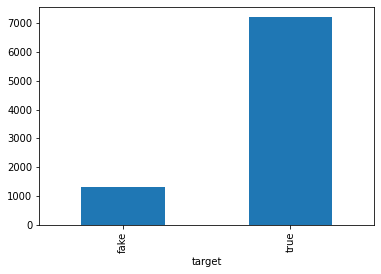

In [ ]:
from matplotlib import pyplot as plt
print(news.groupby(['target'])['headline'].count())
news.groupby(['target'])['headline'].count().plot(kind="bar")
plt.show()

In [ ]:
from matplotlib import pyplot as plt
print(news.groupby(['target'])['content'].count())
news.groupby(['target'])['content'].count().plot(kind="bar")
plt.show()

NameError: ignored

We will shuffle the data to prevent bias:


In [ ]:
news = news.sample(frac = 1)

In [ ]:
news.head(20)

,articleID,domain,date,category,headline,content,label,target,source,relation
677,NaN,jugantor.com,2018-09-22 20:58:23,Editorial,ট্রাম্পের পরিণতি হবে সাদ্দামের মতো!,ইরাকের সাবেক প্রেসিডেন্ট সাদ্দাম হোসেন যে পরিণ...,1.0,true,ইরানের প্রেসিডেন্ট,Related
7227,NaN,banglatribune.com,2018-09-22 18:42:34,National,রংপুরে পুলিশি বাধা উপেক্ষা করে বাম জোটের বিক্ষোভ,ঢাকায় বাম জোটের মিছিলে পুলিশের হামলা ও লাঠিচার...,1.0,true,reproter,Related
3149,NaN,kalerkantho.com,2018-09-19 18:25:52,Sports,মাঠে নেমেই ধাক্কা খেল পাকিস্তান,টসে জিতে ব্যাট করতে নেমে ব্যাপক চাপের মুখে পড়ে...,1.0,true,Journalist,Related
346,NaN,kalerkantho.com,2018-09-21 02:13:54,Politics,আ. লীগের ‘নির্বাচনী প্রচারণা’ ঢাকা থেকে কক্সবা...,আসন্ন একাদশ জাতীয় সংসদ নির্বাচন সামনে রেখে ঢাক...,1.0,true,দলীয় সূত্র,Related
7998,NaN,independent24.com,2018-10-02 23:15:02,National,বাগেরহাটে আ.লীগের দুপক্ষের দ্বন্দ্বের জেরে নিহত ২,বাগেরহাটের মোরেলগঞ্জে আওয়ামী লীগের দুপক্ষের দ্...,1.0,true,reporter,Related
2823,NaN,dhakatimes24.com,2018-09-20 21:00:44,National,বরিশালে ৬-২৮ অক্টোবর ইলিশ শিকার নিষিদ্ধ,সাত হাজার বর্গ কিলোমিটার নদ-নদীতে ইলিশের প্রজন...,1.0,true,জেলা মৎস্য কর্মকর্তা,Related
7759,NaN,independent24.com,2018-10-08 14:49:22,National,প্রতিমা তৈরিতে ব্যস্ত কারিগররা,শারদীয় দুর্গাপূজা উপলক্ষে ব্যস্ত সময় পার করছেন...,1.0,true,reporter,Related
5640,NaN,bangla.thereport24.com,2018-09-22 15:29:18,Politics,‘সরকারের মেডিকেল বোর্ড দিয়ে খালেদার উপযুক্ত চি...,দ্য রিপোর্ট প্রতিবেদক : সরকারের গঠিত মেডিকেল ব...,1.0,true,বিএনপির স্থায়ী কমিটি সদস্য,Related
4720,NaN,dhakatimes24.com,2018-09-19 22:14:01,National,নেত্রকোণায় ছেলে হত্যার অভিযোগে মা গ্রেপ্তার,নেত্রকোণার কেন্দুয়ায় শিশুপুত্র জনি হত্যায় জড়ি...,1.0,true,কেন্দুয়া থানা ওসি,Related
7655,NaN,samakal.com,2018-09-20 01:12:40,Politics,৩০০ আসনে প্রার্থী দিতে প্রস্তুতি নিচ্ছে বৃহত্ত...,﻿চলমান রাজনীতিতে নতুন মাত্রা যোগ করেছে বৃহত্তর...,1.0,true,Reporter,Related


Removing the date and label 

In [ ]:
news.drop(["date"],axis=1,inplace=True)
news.drop(["label"],axis=1,inplace=True)
news.drop(["domain"],axis=1,inplace=True)
news.drop(["relation"],axis=1,inplace=True)
news.drop(["source"],axis=1,inplace=True)


In [ ]:
news.head(20)

,articleID,category,headline,content,target
677,NaN,Editorial,ট্রাম্পের পরিণতি হবে সাদ্দামের মতো!,ইরাকের সাবেক প্রেসিডেন্ট সাদ্দাম হোসেন যে পরিণ...,true
7227,NaN,National,রংপুরে পুলিশি বাধা উপেক্ষা করে বাম জোটের বিক্ষোভ,ঢাকায় বাম জোটের মিছিলে পুলিশের হামলা ও লাঠিচার...,true
3149,NaN,Sports,মাঠে নেমেই ধাক্কা খেল পাকিস্তান,টসে জিতে ব্যাট করতে নেমে ব্যাপক চাপের মুখে পড়ে...,true
346,NaN,Politics,আ. লীগের ‘নির্বাচনী প্রচারণা’ ঢাকা থেকে কক্সবা...,আসন্ন একাদশ জাতীয় সংসদ নির্বাচন সামনে রেখে ঢাক...,true
7998,NaN,National,বাগেরহাটে আ.লীগের দুপক্ষের দ্বন্দ্বের জেরে নিহত ২,বাগেরহাটের মোরেলগঞ্জে আওয়ামী লীগের দুপক্ষের দ্...,true
2823,NaN,National,বরিশালে ৬-২৮ অক্টোবর ইলিশ শিকার নিষিদ্ধ,সাত হাজার বর্গ কিলোমিটার নদ-নদীতে ইলিশের প্রজন...,true
7759,NaN,National,প্রতিমা তৈরিতে ব্যস্ত কারিগররা,শারদীয় দুর্গাপূজা উপলক্ষে ব্যস্ত সময় পার করছেন...,true
5640,NaN,Politics,‘সরকারের মেডিকেল বোর্ড দিয়ে খালেদার উপযুক্ত চি...,দ্য রিপোর্ট প্রতিবেদক : সরকারের গঠিত মেডিকেল ব...,true
4720,NaN,National,নেত্রকোণায় ছেলে হত্যার অভিযোগে মা গ্রেপ্তার,নেত্রকোণার কেন্দুয়ায় শিশুপুত্র জনি হত্যায় জড়ি...,true
7655,NaN,Politics,৩০০ আসনে প্রার্থী দিতে প্রস্তুতি নিচ্ছে বৃহত্ত...,﻿চলমান রাজনীতিতে নতুন মাত্রা যোগ করেছে বৃহত্তর...,true


**Remove** stopwords,Puncuation and digit



In [ ]:
from bnlp.corpus import stopwords, punctuations, letters, digits

In [ ]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in (punctuations)]
    clean_str = ''.join(all_list)
    return clean_str
news['headline'] = news['headline'].apply(punctuation_removal)
print(news['headline'])

677                    ট্রাম্পের পরিণতি হবে সাদ্দামের মতো
7227     রংপুরে পুলিশি বাধা উপেক্ষা করে বাম জোটের বিক্ষোভ
3149                      মাঠে নেমেই ধাক্কা খেল পাকিস্তান
346     আ লীগের ‘নির্বাচনী প্রচারণা’ ঢাকা থেকে কক্সবাজারে
7998     বাগেরহাটে আলীগের দুপক্ষের দ্বন্দ্বের জেরে নিহত ২
                              ...                        
5192                      বেনাপোলে অস্ত্রগাঁজাসহ একজন আটক
5217     ঘরের মধ্যে রক্তমাখা ছুরিনূপুর নিখোঁজ স্কুলছাত্রী
5780    রাজশাহী৬ আসনে বিএনপিজামায়াত তোষণের অভিযোগে শাহ...
2433            গভীর রাতে মেয়েকে বিয়ে দিতে বরের বাড়ি এরপর
7254    জাহাজে ওয়াচম্যান নিয়োগের নির্দেশ মানা হচ্ছে না...
Name: headline, Length: 8501, dtype: object


In [ ]:
import string
def stopword_removal(text):
    all_list = [char for char in text if char not in stopwords]
    clean_str = ''.join(all_list)
    return clean_str
news['headline'] = news['headline'].apply(stopword_removal)
print(news['headline'])

677                        ট্াম্পে পিণতি হবে সাদ্দামে মতো
7227         ংপুে পুলিশি বাধা উপেক্ষা কে বাম জোটে বিক্ষোভ
3149                       মাঠে নেমে ধাক্কা খেল পাকিস্তান
346          আ লীগে ‘নি্বাচনী প্চাণা’ ঢাকা থেকে কক্সবাজাে
7998          বাগেহাটে আলীগে দুপক্ষে দ্বন্দ্বে জেে নিহত ২
                              ...                        
5192                        বেনাপোলে অস্ত্গাঁজাসহ কজন আটক
5217           ঘে মধ্যে ক্তমাখা ছুিনূপু নিখোঁজ স্কুলছাত্ী
5780       াজশাহী৬ আসনে বিনপিজামায়াত তোষণে অভিযোগে শাহিয়া
2433                   গভী াতে মেয়েকে বিয়ে দিতে বে বাড়ি প
7254    জাহাজে য়াচম্যান নিয়োগে নি্দেশ মানা হচ্ছে না মো...
Name: headline, Length: 8501, dtype: object


In [ ]:
import string
def digit_removal(text):
    all_list = [char for char in text if char not in digits]
    clean_str = ''.join(all_list)
    return clean_str
news['headline'] = news['headline'].apply(digit_removal)
print(news['headline'])

677                        ট্াম্পে পিণতি হবে সাদ্দামে মতো
7227         ংপুে পুলিশি বাধা উপেক্ষা কে বাম জোটে বিক্ষোভ
3149                       মাঠে নেমে ধাক্কা খেল পাকিস্তান
346          আ লীগে ‘নি্বাচনী প্চাণা’ ঢাকা থেকে কক্সবাজাে
7998           বাগেহাটে আলীগে দুপক্ষে দ্বন্দ্বে জেে নিহত 
                              ...                        
5192                        বেনাপোলে অস্ত্গাঁজাসহ কজন আটক
5217           ঘে মধ্যে ক্তমাখা ছুিনূপু নিখোঁজ স্কুলছাত্ী
5780        াজশাহী আসনে বিনপিজামায়াত তোষণে অভিযোগে শাহিয়া
2433                   গভী াতে মেয়েকে বিয়ে দিতে বে বাড়ি প
7254    জাহাজে য়াচম্যান নিয়োগে নি্দেশ মানা হচ্ছে না মো...
Name: headline, Length: 8501, dtype: object


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
news["headline"] = news["headline"].apply(lambda x: stem_words(x))
print(news["headline"])

677                        ট্াম্পে পিণতি হবে সাদ্দামে মতো
7227         ংপুে পুলিশি বাধা উপেক্ষা কে বাম জোটে বিক্ষোভ
3149                       মাঠে নেমে ধাক্কা খেল পাকিস্তান
346          আ লীগে ‘নি্বাচনী প্চাণা’ ঢাকা থেকে কক্সবাজাে
7998            বাগেহাটে আলীগে দুপক্ষে দ্বন্দ্বে জেে নিহত
                              ...                        
5192                        বেনাপোলে অস্ত্গাঁজাসহ কজন আটক
5217           ঘে মধ্যে ক্তমাখা ছুিনূপু নিখোঁজ স্কুলছাত্ী
5780        াজশাহী আসনে বিনপিজামায়াত তোষণে অভিযোগে শাহিয়া
2433                   গভী াতে মেয়েকে বিয়ে দিতে বে বাড়ি প
7254    জাহাজে য়াচম্যান নিয়োগে নি্দেশ মানা হচ্ছে না মো...
Name: headline, Length: 8501, dtype: object


In [ ]:
#Train-test split
x, x_test, y, y_test = train_test_split(news['headline'], news.target, test_size=0.2, random_state=1)

In [ ]:

#vec = CountVectorizer(stop_words='english')

vec = CountVectorizer(stop_words=stopwords)
x = vec.fit_transform(x).toarray()
x_test = vec.transform(x_test).toarray()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['অথব', 'অন', 'অবধ', 'অবশ', 'অর', 'আগ', 'আছ', 'আদ', 'আপন', 'আব', 'আম', 'আমর', 'ইত', 'ইহ', 'উই', 'উক', 'উচ', 'উত', 'উন', 'এক', 'একট', 'একব', 'এখ', 'এট', 'এতট', 'এদ', 'এমনক', 'ওক', 'ওখ', 'ওদ', 'ওয', 'ওয়', 'কট', 'কব', 'কমন', 'কয', 'কর', 'করছ', 'করত', 'করব', 'করল', 'কয়', 'খত', 'চল', 'জনক', 'তথ', 'তব', 'তর', 'থম', 'ধর', 'নঐ', 'নও', 'নজন', 'নত', 'নয', 'পক', 'পষ', 'ফল', 'বক', 'বদল', 'বয', 'বর', 'বল', 'বলত', 'বস', 'বহ', 'মত', 'মধ', 'মন', 'যওজ', 'যতট', 'যথ', 'যদ', 'যন', 'যবহ', 'যভ', 'যম', 'রও', 'রণ', 'রত', 'রথম', 'রপর', 'রভ', 'রয', 'রযন', 'লক', 'ষয', 'সঙ', 'সম', 'সমস', 'হইত', 'হইব', 'হইয', 'হওয', 'হচ', 'হব', 'হয'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(x,y).predict(x_test)

In [ ]:
model = GaussianNB()
model.fit(x, y)
prediction = model.predict(x_test)
#prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 42.09%


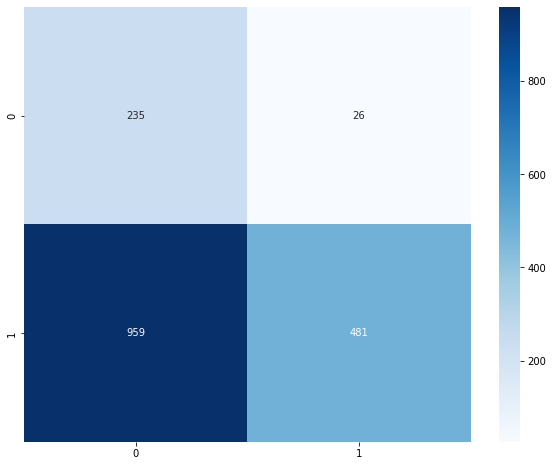

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
cf_train_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(10,8))
sns.heatmap(cf_train_matrix, annot=True, fmt='d', cmap='Blues')

In [ ]:
cr = classification_report(y_test, y_pred)
print("\nConfusion Matrix of Gaussian Naive Bayes Classifier:\n")
print(confusion_matrix(y_test, prediction))
print("\n\nClassification Report\n")
print(cr)


Confusion Matrix of Gaussian Naive Bayes Classifier:

[[235  26]
 [959 481]]


Classification Report

              precision    recall  f1-score   support

        fake       0.20      0.90      0.32       261
        true       0.95      0.33      0.49      1440

    accuracy                           0.42      1701
   macro avg       0.57      0.62      0.41      1701
weighted avg       0.83      0.42      0.47      1701

